## Arrest Data
##### By Justin Holt
#### Analyzing number of arrests in various neighborhoods to determine the "safest" neighborhood.
This analysis will then be used, along with two other metrics, the "best" neighborhood in Pittsburgh.

#### Initialization
Just simple initialization of the packages I'm using to analyze the data.

In [74]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#### Data Analysis
Here, I load the data from a .csv file, remove any invalid values, and then get all the neighborhoods were arrests occured and sort their number of arrests from least to greatest. That way, I can see which neighborhoods have had the least amount of arrests. Then, I get the top ten (10) neighborhoods. And so, by my metric, I can establish that these neighborhoods are the "safest."

In [98]:
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f") # Load data from WPRDC
arrests = arrests.dropna() # Remove invalid arrest data
column = "incidentneighborhood".upper()
neighborhoods = arrests[column].value_counts().sort_values(ascending=True) # Sort neighborhoods by least arrests
neighborhoods.head(10) # Get ten (10) most "safest" neighborhoods

Mt. Oliver Neighborhood     2
Outside County              3
Troy Hill-Herrs Island      5
Outside State               6
Mt. Oliver Boro             7
Regent Square              14
Outside City               20
Ridgemont                  20
New Homestead              21
East Carnegie              21
Name: INCIDENTNEIGHBORHOOD, dtype: int64

#### Data Visualization
Just a simple bar chart illustrating the variation in arrests in different neighborhoods:
* The blue plot illustrates all neighborhoods and their arrest data.
* The orange plot illustrates the first ten (10) neighborhoods with the least number of arrests.

<BarContainer object of 10 artists>

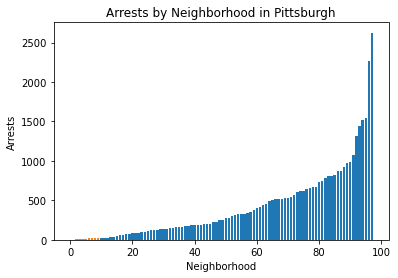

In [99]:
plt.xlabel("Neighborhood") # Label for x-axis
plt.ylabel("Arrests") # Label for y-axis
plt.title("Arrests by Neighborhood in Pittsburgh") # Title of plot
plt.bar(range(len(neighborhoods)), neighborhoods) # All neighborhood data (Blue)
plt.bar(range(10), neighborhoods.head(10)) # First ten (10) neighborhoods with least number of arrests (Orange)

#### Conclusion
From the data analysis, I can conclude that **Mt. Oliver Neighborhood** is the "safest" neighborhood in Pittsburgh.
However, to ensure that this metric can be used with the other two (2) metrics, here are the top ten (10) "safest" neighborhoods:
* **Mt. Oliver Neighborhood**
* Outside Country
* Troy Hill-Herrs Island
* Outside State
* Mt. Oliver Boro
* Regent Square
* Ridgemont
* Outside City
* New Homestead
* East Carnegie